# Дерево решений для классификации

## Подготовка исходных данных

Сгенерировать исходные данные для обучения модели машинного обучения.

Значения параметров выбираются из таблицы 1 "Варианты".docx в соответствие с номером по списку группы в СДО.

In [3]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 265,
                           n_features = 8,
                           n_classes = 2,
                           n_informative = 8,
                           n_redundant = 0,
                           class_sep = 0.35,
                           random_state = 20)

Разделить выборку на обучающую и тестовую.

Использовать параметр `random_state` в соответствие со своим вариантом.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

## Обучение модели

Выбрать случайным образом 10 объектов из набора данных.

In [5]:
import numpy as np

random_indices = np.random.choice(X.shape[0], size=10, replace=False)
chosen_samples = X[random_indices]

Построить модель дерева решений с параметрами по умолчанию.

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier()

Визуализировать полученное дерево.

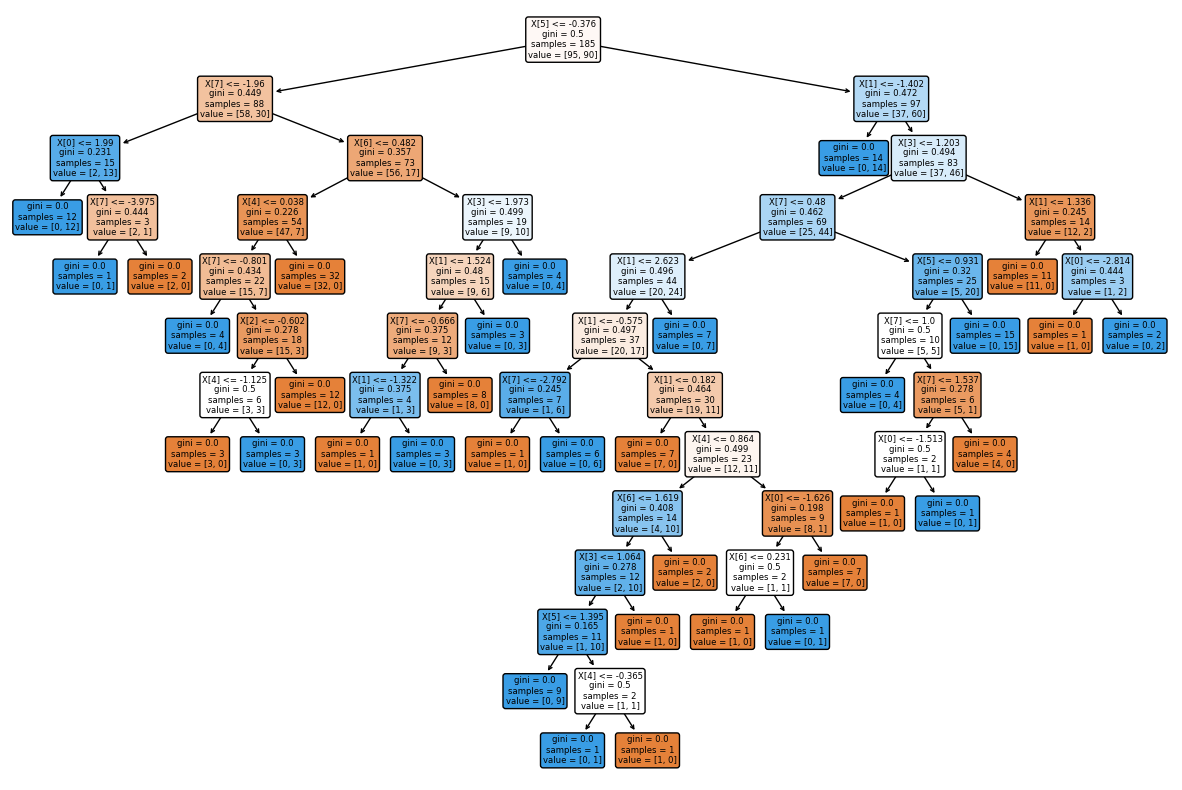

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
tree.plot_tree(model, 
               filled=True, 
               rounded=True)
plt.show()

Вычислить прирост информации для вопроса, который был выбран в корневом узле.

In [11]:
# We need to define 'data' before we can use it in InfoGain function.
# Assuming 'data' is a pandas DataFrame which contains our dataset.
import pandas as pd
import numpy as np

data = pd.DataFrame(np.hstack((X, y.reshape(-1,1))), columns=['feature'+str(i) for i in range(X.shape[1])] + ['target'])

# Define entropy 
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

# Define information gain 
def InfoGain(data,split_attribute_name,target_name):
    total_entropy = entropy(data[target_name])
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])

    # Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

# Assign target column name and split_attribute_name
target_name = 'target'
split_attribute_name = 'feature0'
info_gain = InfoGain(data,split_attribute_name,target_name)
print("The information gain of the split for the root node attribute is: ", info_gain)

The information gain of the split for the root node attribute is:  0.9999075504967974


Вычислить прирост информации для любого альтернативного вопроса и сравнить полученные значения.

In [12]:
# Let's select an alternative split attribute for comparison:
alternative_split_attribute_name = 'feature1'
alternative_info_gain = InfoGain(data, alternative_split_attribute_name, target_name)

print(f"The information gain of the alternative split attribute '{alternative_split_attribute_name}' is: ", alternative_info_gain)
print(f"The information gain of the initial root node attribute '{split_attribute_name}' is: ", info_gain)

The information gain of the alternative split attribute 'feature1' is:  0.9999075504967974
The information gain of the initial root node attribute 'feature0' is:  0.9999075504967974


Разделить исходные данные на обучающую и тестовую выборки.

Доля объектов в тестовой выборке - 0,3.

Параметр `random_state` в соответствие с вариантом.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

Обучить модель дерева решений на обучающей выборке с параметрами по умолчанию.

In [14]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

DecisionTreeRegressor()

Визуализировать полученное дерево.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24576 sha256=0d72010b1f9d794538db6b2dac5df52f14b2b154e163718ab85a6b755792f2ee
  Stored in directory: /root/.cache/pip/wheels/89/e5/de/6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


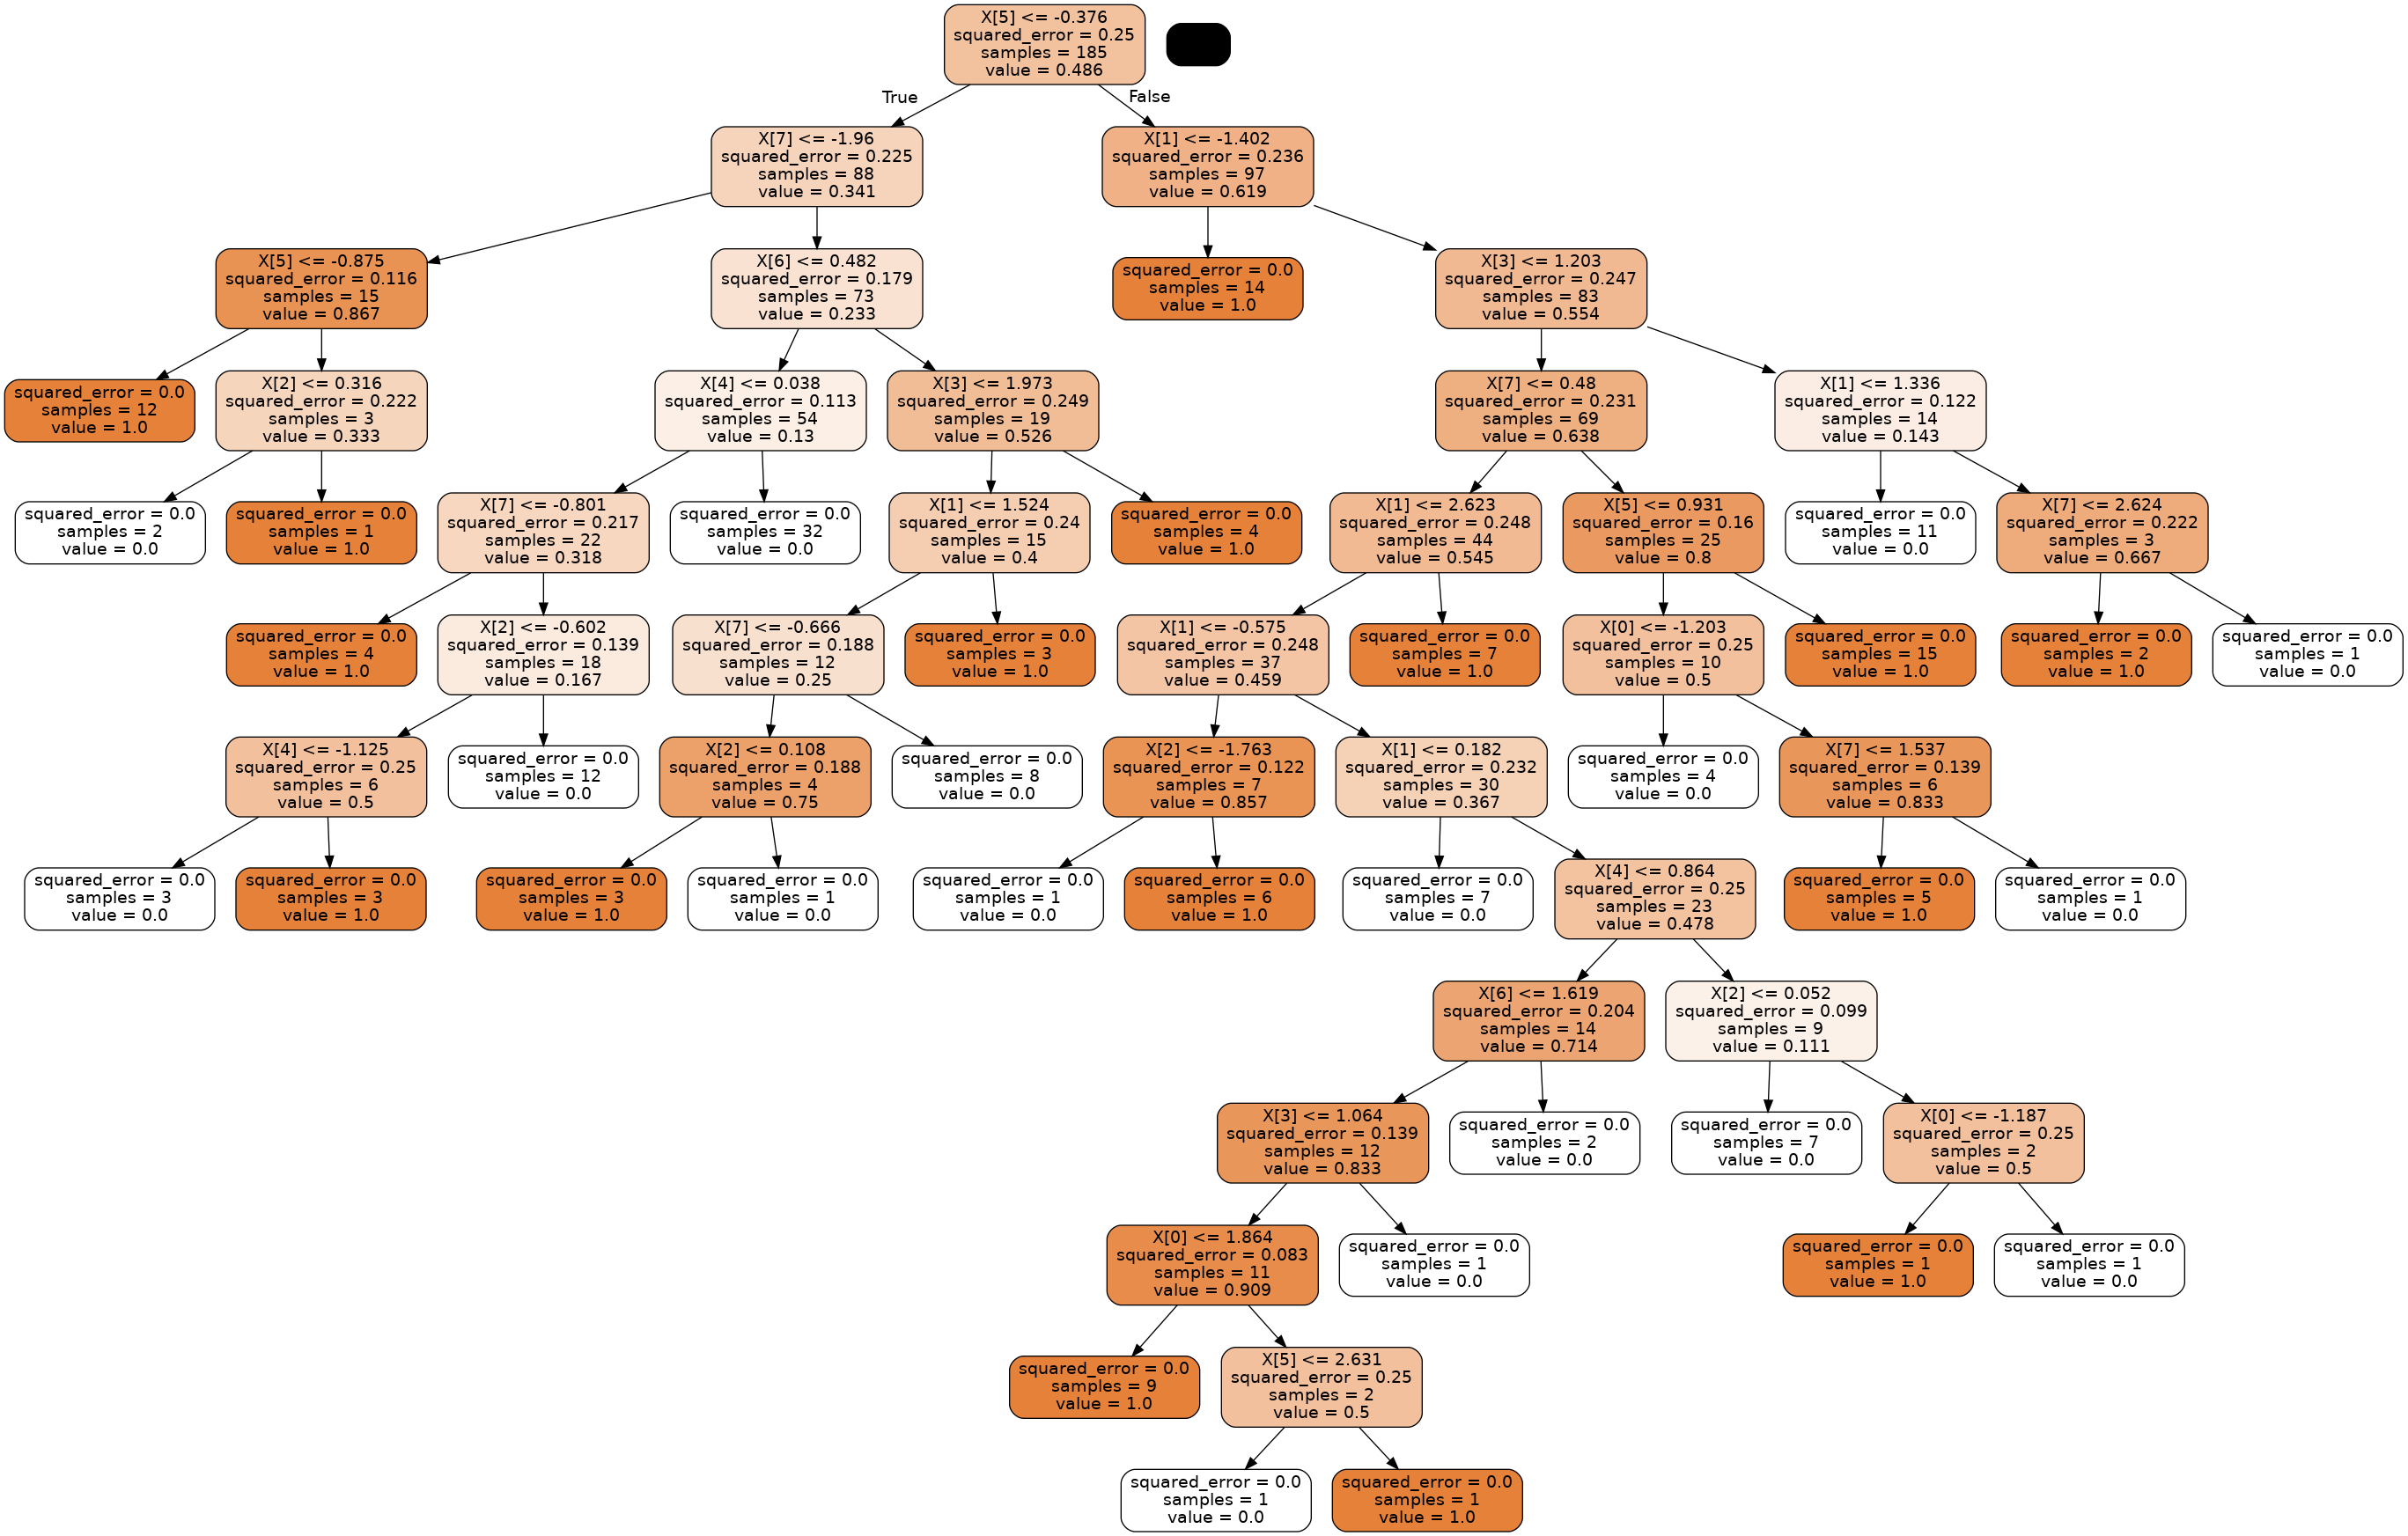

In [16]:
!pip install pydotplus
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  

# Create DOT data
dot_data = export_graphviz(model, filled=True, rounded=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

Вывести количество уровней (глубину) дерева.

In [17]:
print("Depth of the decision tree: ", model.tree_.max_depth)

Depth of the decision tree:  12


Вывести количество листев дерева.

In [19]:
print("Number of leaves in the decision tree: ", model.get_n_leaves())

Number of leaves in the decision tree:  33


## Оценивание качества модели

С использованием класса `ConfusionMatrix` библиотеки `yellowbrick` построить матрицу ошибок для обучающей и тестовой выборок.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 31.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-

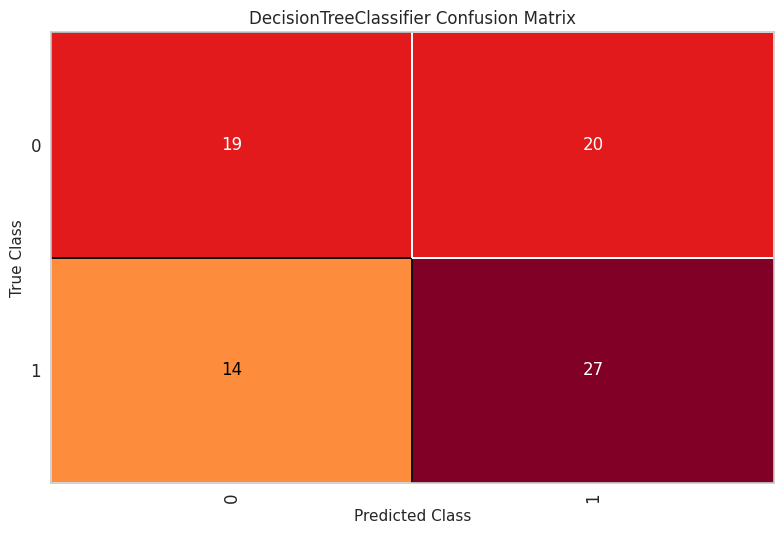

<AxesSubplot: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [21]:
!pip install yellowbrick
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier

# Create the DecisionTree Classifier model
model = DecisionTreeClassifier()

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

Выычислить метрику accuracy для обучающей и тестовой выборок.

In [22]:
from sklearn.metrics import accuracy_score

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_accuracy, test_accuracy

(1.0, 0.575)

## Подбор оптимальных гиперпараметров модели

Осуществить подбор гиперараметров модели дерева решений:
-  `max_depth`;
- `min_samples_leaf`;
- `max_features`.

### "Ручной" подбор

Построить валидационные кривые для оценивания оптимального диапазона изменения гиперпараметров.

Параметр кросс-валидации - 5.

Метрика качества модели - accuracy.

Построить валидационные кривые для гиперпараметра `max_depth`.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

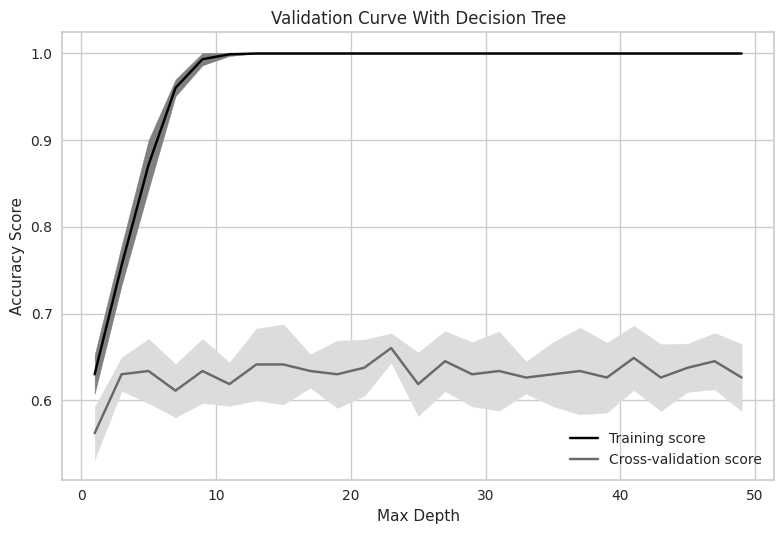

In [24]:
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Define parameter range
param_range = np.arange(1, 50, 2)

# Calculate accuracy on training and test set using the range of parameter values
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), 
                                             X, 
                                             y, 
                                             param_name="max_depth", 
                                             param_range=param_range,
                                             cv=5, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Decision Tree")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

Построить валидационные кривые для гиперпараметра `min_samples_leaf`.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

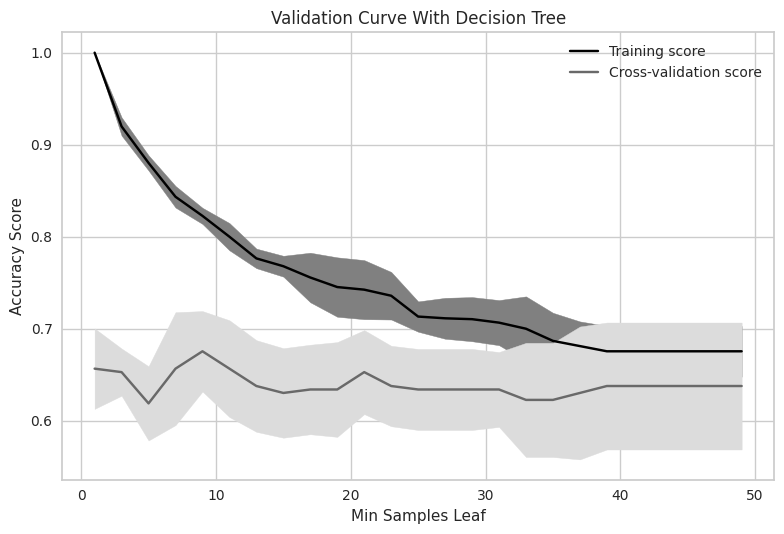

In [25]:
# Define parameter range
param_range = np.arange(1, 50, 2)

# Calculate accuracy on training and test set using the range of parameter values
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), 
                                             X, 
                                             y, 
                                             param_name="min_samples_leaf", 
                                             param_range=param_range,
                                             cv=5, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Decision Tree")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

Обучить модель дерева решений с произвольным значением гиперпараметра `min_samples_leaf` из найденного диапазона и зафиксированном на предыдущем шаге значением гиперпараметра `max_depth`.

Оценить качество модели на обучающей и тестовой выборках по метрике accuracy.

In [26]:
# Create the DecisionTree Classifier model with min_samples_leaf=4 and max_depth=11
model = DecisionTreeClassifier(min_samples_leaf=4, max_depth=11)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_accuracy, test_accuracy

(0.918918918918919, 0.5375)

Построить валидационные кривые для гиперпараметра `max_features`.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

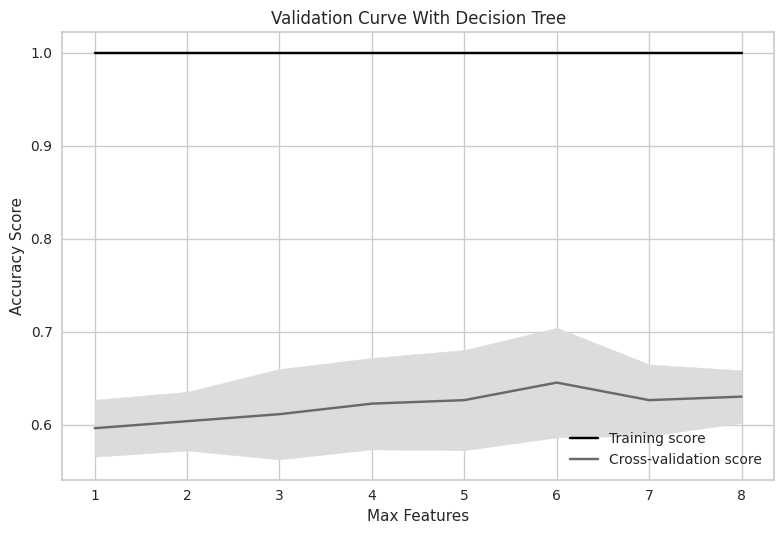

In [27]:
# Define parameter range
param_range = np.arange(1, X.shape[1]+1)

# Calculate accuracy on training and test set using the range of parameter values
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), 
                                             X, 
                                             y, 
                                             param_name="max_features", 
                                             param_range=param_range,
                                             cv=5, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Decision Tree")
plt.xlabel("Max Features")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

Обучить модель дерева решений с произвольным значением гиперпараметра `max_features` из найденного диапазона и зафиксированными на предыдущих шагах значениями гиперпараметров `max_depth` и `min_samples_leaf` .

Оценить качество модели на обучающей и тестовой выборках по метрике accuracy.

In [28]:
# Create the DecisionTree Classifier model with min_samples_leaf=4, max_depth=11 and max_features=6
model = DecisionTreeClassifier(min_samples_leaf=4, max_depth=11, max_features=6)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_accuracy, test_accuracy

(0.8972972972972973, 0.5375)

Визуализировать полученное дерево решений.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

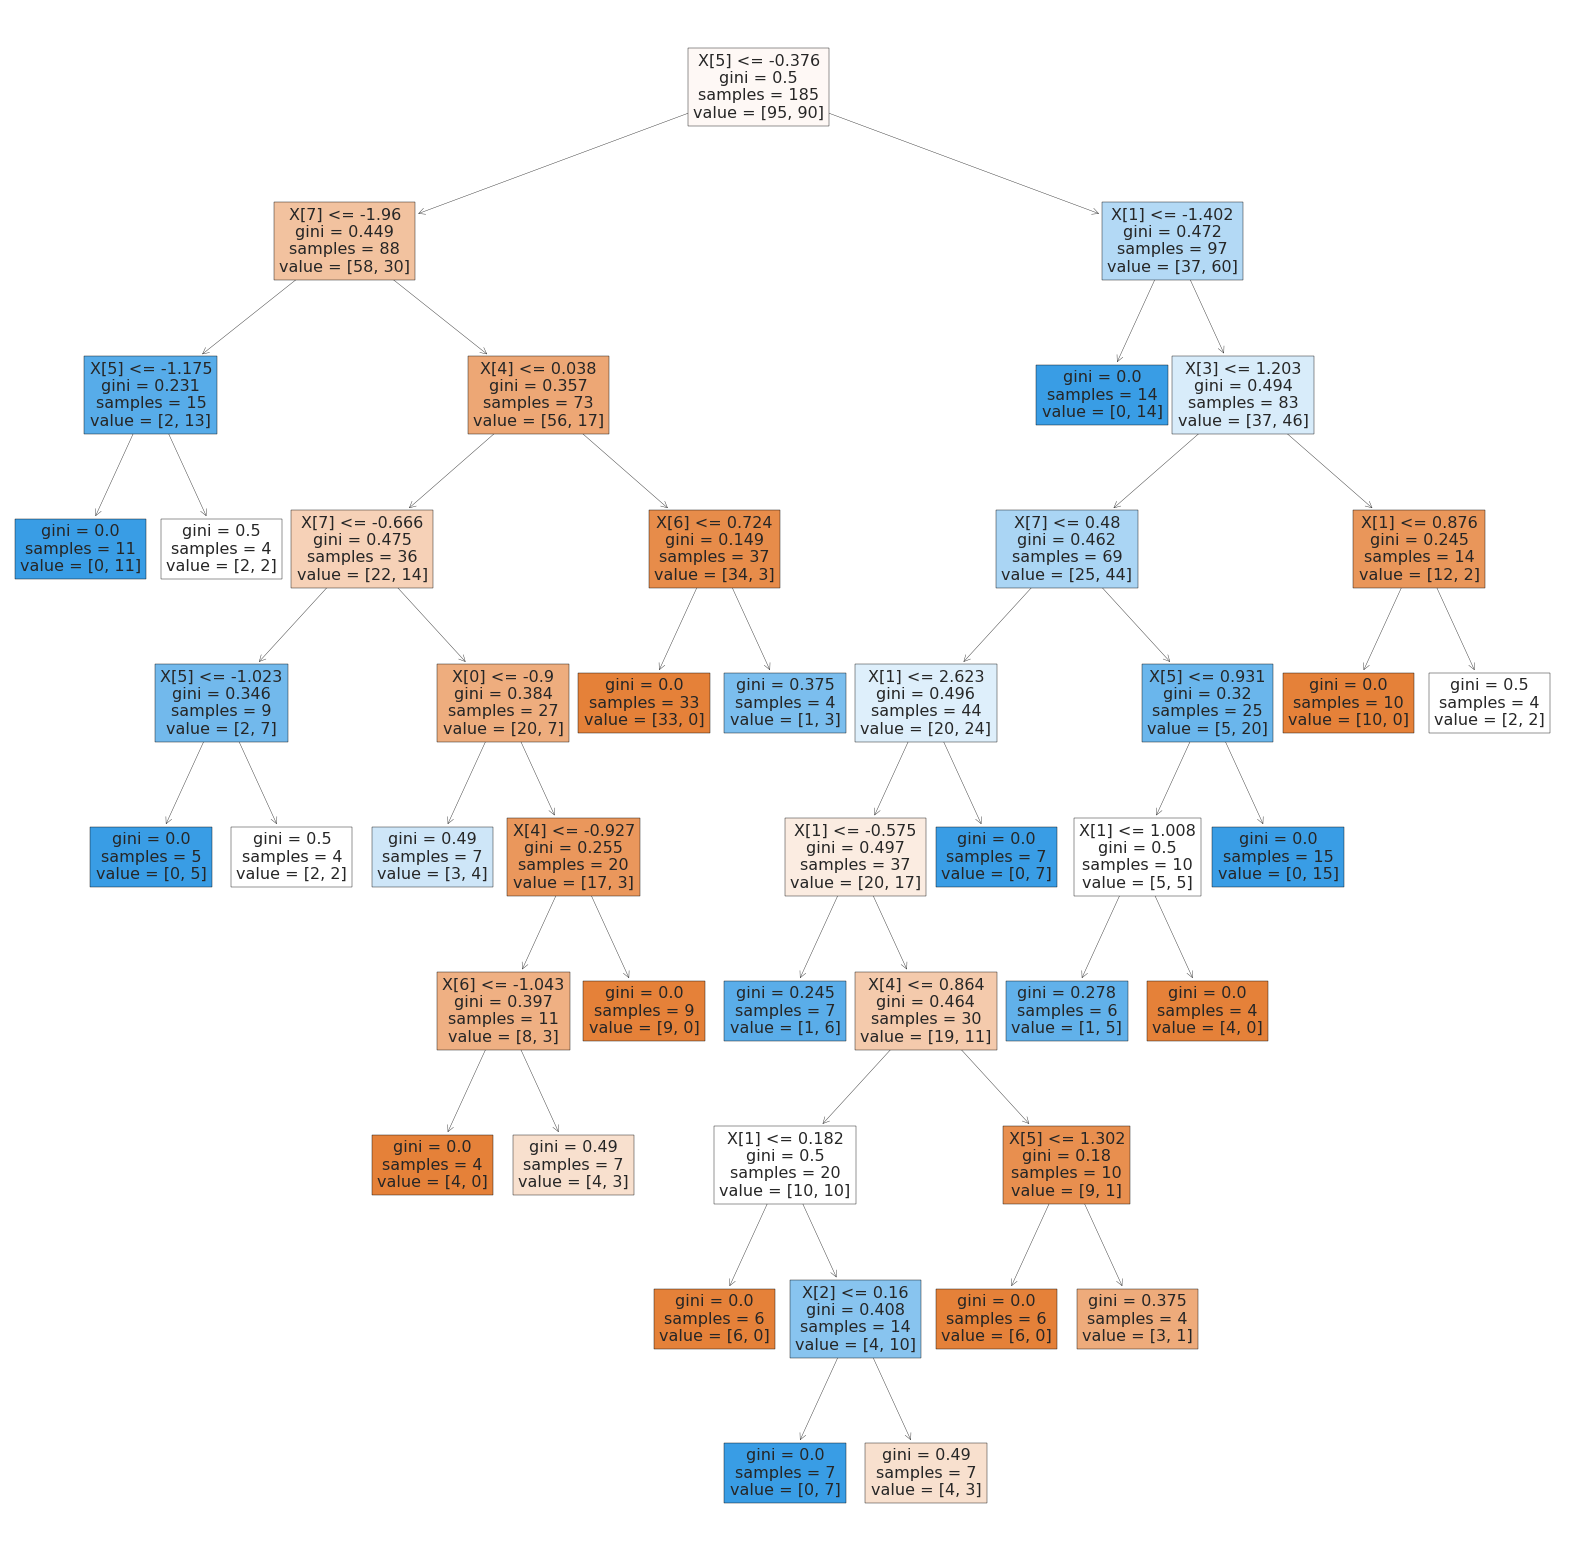

In [29]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))  # Modify size as needed
tree.plot_tree(model, filled=True)  
plt.show()

### Поиск на сетке

Определить оптимальные значения гиперпараметров модели дерева решений с использованием поиска на сетке.

Использовать `random_state` - номер варианта.

In [30]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': range(1, 15),
    'min_samples_leaf': range(1, 20),
    'max_features': range(1, X.shape[1] + 1)
}

# Initialize the DecisionTree Classifier
model = DecisionTreeClassifier(random_state=20)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=20),
             param_grid={'max_depth': range(1, 15), 'max_features': range(1, 9),
                         'min_samples_leaf': range(1, 20)},
             scoring='accuracy')

Вывести оптимальные значения гиперпараметров.

In [31]:
# Print the optimal parameters
print(grid_search.best_params_)

{'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 10}


Обучить модель дерева решений с найденными оптимальными значениями гиперпараметров.

In [32]:
# Retrieve the best parameters from grid search
best_params = grid_search.best_params_

# Create a DecisionTree Classifier with best parameters
model = DecisionTreeClassifier(max_depth=best_params['max_depth'], 
                               min_samples_leaf=best_params['min_samples_leaf'], 
                               max_features=best_params['max_features'])

# Fit the model to the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=4, min_samples_leaf=10)

Вычислить метрику accuracy на обучающей и тестовой выборках.

In [33]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_accuracy, test_accuracy

(0.7297297297297297, 0.6125)

Сравнить качество моделей с гиперпараметрами по умолчанию и с оптимальными гиперпараметрами.

Acuracy у модель, с параметрами, которые мы подбираели, оказалась выше, нежели с поиском на сетке

## Использование модели для предсказания класса

Задать произвольный и определить, к какому классу он будет принадлежать.

In [34]:
# Set an arbitrary data instance
arbitrary_data = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]])

# Use the fitted model to predict the class of the arbitrary instance
predicted_class = model.predict(arbitrary_data)

print("The predicted class of the arbitray instance is: ", predicted_class)

The predicted class of the arbitray instance is:  [1]


## Оценивание важности признаков

Для построенной модели оценить степень важности признаков с использованием атрибута `feature_importances_` класса `DecisionTreeClassifier`.

In [35]:
# Get feature importance
feature_importance = model.feature_importances_

# Print Feature Importance
print("Feature Importance: ", feature_importance)

Feature Importance:  [0.         0.16550231 0.19854585 0.19811756 0.19055202 0.24728226
 0.         0.        ]


Создать таблицу, содержащую названия признаков и оценки степени их важности.

In [36]:
# Create a DataFrame that encodes feature names to their importance
importance_df = pd.DataFrame({
    "Feature": data.columns[:-1],  # Assuming the target is the last column
    "Importance": feature_importance
})

# Display DataFrame
importance_df

,Feature,Importance
0,feature0,0.000000
1,feature1,0.165502
2,feature2,0.198546
3,feature3,0.198118
4,feature4,0.190552
5,feature5,0.247282
6,feature6,0.000000
7,feature7,0.000000


Отсортировать записи в таблице по убыванию степени важности признаков.

In [38]:
importance_df = importance_df.sort_values('Importance', ascending=False)
importance_df

,Feature,Importance
5,feature5,0.247282
2,feature2,0.198546
3,feature3,0.198118
4,feature4,0.190552
1,feature1,0.165502
0,feature0,0.000000
6,feature6,0.000000
7,feature7,0.000000


Построить диаграмму `bar` для визуализации степени важности признаков.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

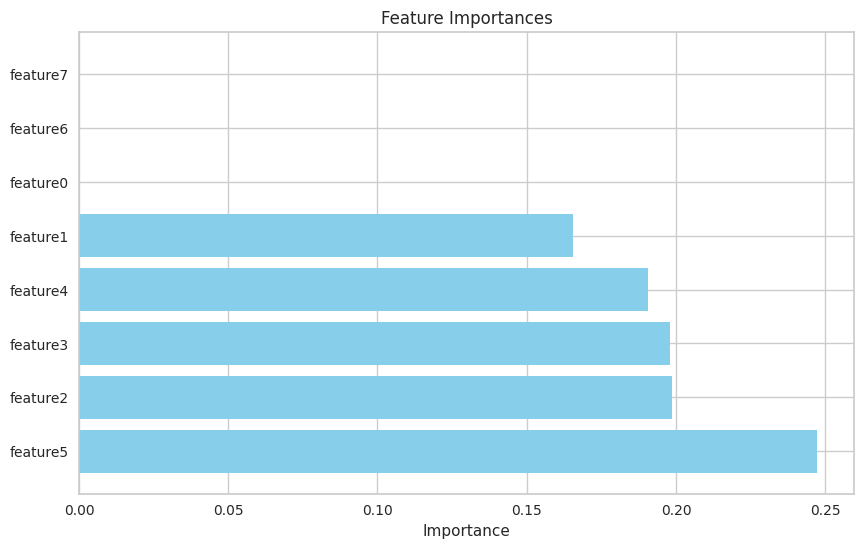

In [39]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

Сформировать набор данных содержащих 3 наиболее значимых признака.

In [40]:
# Select 3 most important features
most_important_features = importance_df['Feature'].head(3)

# Create a new DataFrame with only the 3 most important features
data_most_important = data[most_important_features]

Разделить данные на обучающую и тестовую выборки.

Доля объектов в тестовой выборке - 0,3.

Параметр `random_state` - номер варианта.

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_most_important, y, test_size=0.3, random_state=20)

Определить поиском на сетке оптимальные значения гиперпараметров модели дерева решений.

In [42]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': range(1, 15),
    'min_samples_leaf': range(1, 20),
    'max_features': range(1, X.shape[1] + 1)
}

# Initialize the DecisionTree Classifier
model = DecisionTreeRegressor(random_state=20)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=20),
             param_grid={'max_depth': range(1, 15), 'max_features': range(1, 9),
                         'min_samples_leaf': range(1, 20)},
             scoring='neg_mean_squared_error')

Обучить модель дерева решений с найденными оптимальными значениями гиперпараметров.

In [43]:
# Retrieve the best parameters from grid search
best_params = grid_search.best_params_

# Create a DecisionTree Classifier with best parameters
model = DecisionTreeClassifier(max_depth=best_params['max_depth'], 
                               min_samples_leaf=best_params['min_samples_leaf'], 
                               max_features=best_params['max_features'])

# Fit the model to the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_leaf=16)

Вычислить метрику accuracy на обучающей и тестовой выборках.

In [44]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_accuracy, test_accuracy

(0.7243243243243244, 0.5375)

Сделать вывод о влиянии количества признаков на качество модели дерева решений.

# Дерево решений для регрессии

## Подготовка исходных данных

Сгенерировать исходные данные для обучения модели машинного обучения.

Значения параметров выбираются из таблицы 2 "Варианты".docx в соответствие с номером по списку группы в СДО.

In [45]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 265,
                       n_features = 8,
                       noise = 1.2,
                       n_informative = 6,
                       random_state = 20)

Разделить выборку на обучающую и тестовую.

Использовать параметр `random_state` в соответствие со своим вариантом.

In [46]:
from sklearn.model_selection import train_test_split

# Split the dataset into a training and a testing set
# Test set will be the 30% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

## Обучение модели

Обучить модель дерева решений с гиперпараметрами по умолчанию.

In [47]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the DecisionTree Regressor
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

DecisionTreeRegressor()

Визуализировать полученное дерево.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

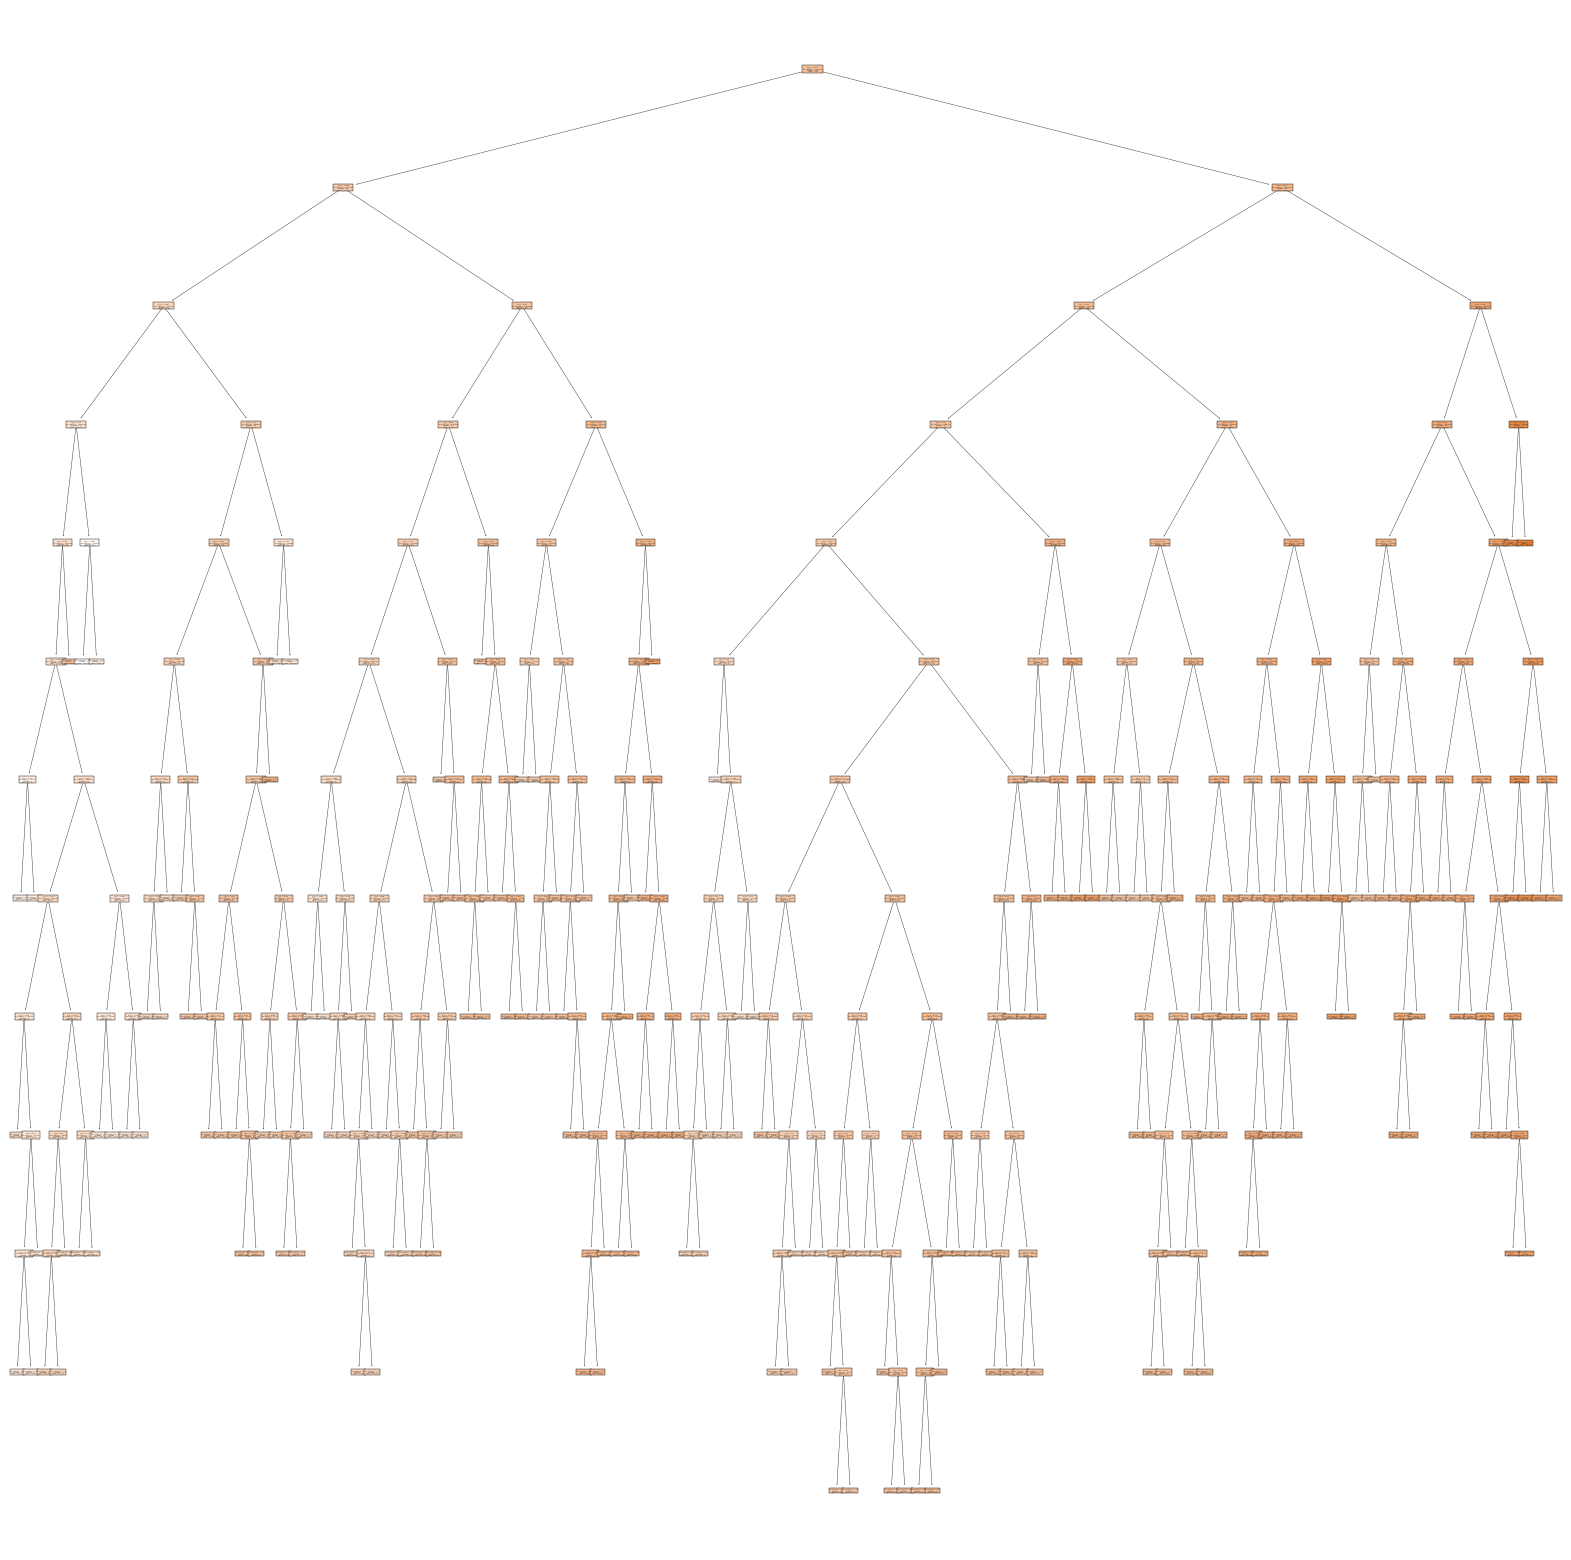

In [48]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))  # Modify size as needed
tree.plot_tree(model, filled=True)  
plt.show()

## Оценивание качества модели

Оценить качество модели на обучащей выборке с использованием метрик MSE и R2.

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate Mean Squared Error
mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R² Score
r2 = r2_score(y_train, y_train_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 0.0
R² Score: 1.0


Оценить качество модели на тестовой выборке с использованием метрик MSE и R2.

In [50]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R² Score
r2 = r2_score(y_test, y_test_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 17503.751677210286
R² Score: 0.36450593949145926


Сделать вывод о качестве модели.

## Подбор оптимальных гиперпараметров модели

Подобрать оптимальные значения гиперпараметров `max_depth`, `max_depth`, `max_features` с использованием поиска на сетке.

In [51]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': range(1, 16),
    'min_samples_leaf': range(1, 16),
    'max_features': range(1, X_train.shape[1] + 1)
}

# Initialize the DecisionTree Regressor
model = DecisionTreeRegressor(random_state=20)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=20),
             param_grid={'max_depth': range(1, 16), 'max_features': range(1, 9),
                         'min_samples_leaf': range(1, 16)},
             scoring='neg_mean_squared_error')

Вывести оптимальные значения гиперпараметров.

In [52]:
print(grid_search.best_params_)

{'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 1}


Обучить модель дерева решений с найденными оптимальными значениями гиперпараметров.

In [53]:
# Retrieve the best parameters from grid search
best_params = grid_search.best_params_

# Create a DecisionTree Regressor with best parameters
model = DecisionTreeRegressor(max_depth=best_params['max_depth'], 
                              min_samples_leaf=best_params['min_samples_leaf'], 
                              max_features=best_params['max_features'])

# Fit the model to the training data
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, max_features=5)

Оценить качество модели на обучащей выборке с использованием метрик MSE и R2.

In [54]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate Mean Squared Error
mse = mean_squared_error(y_train, y_train_pred)
print(f"Training Mean Squared Error: {mse}")

# Calculate R² Score
r2 = r2_score(y_train, y_train_pred)
print(f"Training R² Score: {r2}")

Training Mean Squared Error: 955.4361545353621
Training R² Score: 0.9618728713126478


## Оценивание важности признаков

Оценить степень важности признаков.

In [57]:
# Get feature importance
feature_importance = model.feature_importances_

# Print Feature Importance
print("Feature Importance: ", feature_importance)

Feature Importance:  [0.0283345  0.00860536 0.2366645  0.25701872 0.20261583 0.15474121
 0.07034177 0.04167811]


Сформировать набор данных содержащих 3 наиболее значимых признака.

In [58]:
# Select 3 most important features
important_features_indices = np.argsort(feature_importance)[-3:]

# Create a new DataFrame with only the 3 most important features
X_most_important = X[:, important_features_indices]

Разделить данные на обучающую и тестовую выборки.

Доля объектов в тестовой выборке - 0,3.

Параметр `random_state` - номер варианта.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_most_important, y, test_size=0.3, random_state=20)

Определить поиском на сетке оптимальные значения гиперпараметров модели дерева решений.

In [60]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': range(1, 16),
    'min_samples_leaf': range(1, 16),
    'max_features': range(1, X_train.shape[1] + 1)
}

# Initialize the DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=20)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=20),
             param_grid={'max_depth': range(1, 16), 'max_features': range(1, 4),
                         'min_samples_leaf': range(1, 16)},
             scoring='neg_mean_squared_error')

Обучить модель дерева решений с найденными оптимальными значениями гиперпараметров.

In [61]:
# Retrieve the best parameters from grid search
best_params = grid_search.best_params_

# Create a DecisionTreeRegressor with best parameters
model = DecisionTreeRegressor(max_depth=best_params['max_depth'], 
                              min_samples_leaf=best_params['min_samples_leaf'], 
                              max_features=best_params['max_features'])

# Fit the model to the training data
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, max_features=2, min_samples_leaf=4)

Вычислить метрику accuracy на обучающей и тестовой выборках.

In [65]:
# Given that the model is a Regression model, we can't use accuracy score which is a classification metric.
# Instead we should use MSE and R2 for evaluating the model performance.

# Calculate Mean Squared Error for training and testing set
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training Mean Squared Error: {mse_train}")

mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Testing Mean Squared Error: {mse_test}")

# Calculate R² Score for training and testing set
r2_train = r2_score(y_train, y_train_pred)
print(f"Training R² Score: {r2_train}")

r2_test = r2_score(y_test, y_test_pred)
print(f"Testing R² Score: {r2_test}")

Training Mean Squared Error: 6284.403710517277
Testing Mean Squared Error: 17477.3883820705
Training R² Score: 0.7492179170143622
Testing R² Score: 0.36546308958052154


Сделать вывод о влиянии количества признаков на качество модели дерева решений.

Из данных можно сделать вывод, что количество признаков влияет на качество модели дерева решений. При увеличении количества признаков модель становится более сложной и может переобучаться на тренировочном наборе данных. Это приводит к увеличению значения Training Mean Squared Error и уменьшению значения Testing R² Score. В то же время, при уменьшении количества признаков модель становится более простой и может не учитывать важные признаки, что приводит к увеличению значения Testing Mean Squared Error и уменьшению значения Training R² Score.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a3119bf3-6fce-44e8-b2db-86cd2979fbae' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>